# Azcorra 2023 demo

This tutorial demonstrates how to access an NWB file from the Azcorra 2023 dataset using `pynwb`.

This session contains fiber photometry recordings from head-fixed mice running on a treadmill while receiving rewards and aversive air puffs in order to analyze differences or similarities in functional responses of different subtypes of striatonigral dopamine neurons.



# Reading an NWB file <a name="read-nwb"></a>

This section demonstrates how to read an NWB file using `pynwb`.

Based on the [NWB File Basics](https://pynwb.readthedocs.io/en/stable/tutorials/general/plot_file.html#sphx-glr-tutorials-general-plot-file-py) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

An [NWBFile](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment. Each NWBFile must have a `session description`, `identifier`, and `session start time`.

Reading is carried out using the [NWBHDF5IO](https://pynwb.readthedocs.io/en/stable/pynwb.html#pynwb.NWBHDF5IO) class. To read the NWB file use the read mode ("r") to retrieve an NWBFile object.

In [149]:
from pynwb import NWBHDF5IO

# The file path to a .nwb file
nwbfile_path = "/Volumes/LaCie/CN_GCP/Dombeck/nwbfiles/20200129-0002.nwb"
io = NWBHDF5IO(path=nwbfile_path, mode="r", load_namespaces=True)
nwbfile = io.read()

nwbfile

,location,indicator,optical_fiber,excitation_source,photodetector,dichroic_mirror,depth,coordinates,excitation_filter
id,,,,,,,,,
0,Str,GCaMP6f abc.Indicator at 0x14301734416\nFields:\n injection_coordinates_in_mm: [-3.25 1.55 -3.8 ]\n injection_location: SNc\n label: AAV-GCaMP6f\n,chGreen abc.OpticalFiber at 0x13677612688\nFields:\n description: The optical fiber used to record the GCaMP fluorescence.\n manufacturer: Doric\n model: MFP_200/230/900-0.57_1.5m_FC-FLT_LAF\n numerical_aperture: 0.57\n,"ExcitationSource470 abc.ExcitationSource at 0x14301738896\nFields:\n description: Blue excitation light (470 nm LED, Thorlabs, M70F3) and violet excitation light (for the isosbestic control)\nwere coupled into the optic fiber such that a power of 0.75 mW was delivered to the fiber tip.\nThen, 470 nm and 405 nm excitation were alternated at 100 Hz using a waveform generator,\neach filtered with a corresponding filter.\n\n excitation_wavelength_in_nm: 470.0\n illumination_type: LED\n manufacturer: Thorlabs\n model: M70F3\n",PhotodetectorPMT abc.Photodetector at 0x14301997200\nFields:\n description: Hamamatsu GaAsP photomultiplier tube (signal amplified using Stanford Research Systems SR570 preamplifier).\n detected_wavelength_in_nm: 470.0\n detector_type: PMT\n manufacturer: Hamamatsu Photonics\n model: H10770PA-40\n,DichroicMirror abc.DichroicMirror at 0x14301784400\nFields:\n cut_off_wavelength_in_nm: 500.0\n cut_on_wavelength_in_nm: 465.0\n description: The dichroic mirror used to separate green fluorescence from the excitation light.\n manufacturer: Chroma Technology\n model: T505lpxr\n,1.9,"[3.0312370386262693, -0.58, 3.05888599273903]",OpticalFilter470 abc.OpticalFilter at 0x13675900048\nFields:\n bandwidth_in_nm: [442. 497.]\n description: The filter used to isolate the 470 nm excitation light.\n filter_type: Excitation\n manufacturer: Semrock\n model: FF02-472/30-25\n peak_wavelength_in_nm: 472.0\n
1,Str,GCaMP6f abc.Indicator at 0x14301734416\nFields:\n injection_coordinates_in_mm: [-3.25 1.55 -3.8 ]\n injection_location: SNc\n label: AAV-GCaMP6f\n,chGreen abc.OpticalFiber at 0x13677612688\nFields:\n description: The optical fiber used to record the GCaMP fluorescence.\n manufacturer: Doric\n model: MFP_200/230/900-0.57_1.5m_FC-FLT_LAF\n numerical_aperture: 0.57\n,"ExcitationSource405 abc.ExcitationSource at 0x14301994576\nFields:\n description: Violet LED (405 nm, Thorlabs, M405FP1) for the isosbestic control.\n excitation_wavelength_in_nm: 405.0\n illumination_type: LED\n manufacturer: Thorlabs\n model: M405FP1\n",PhotodetectorPMT abc.Photodetector at 0x14301997200\nFields:\n description: Hamamatsu GaAsP photomultiplier tube (signal amplified using Stanford Research Systems SR570 preamplifier).\n detected_wavelength_in_nm: 470.0\n detector_type: PMT\n manufacturer: Hamamatsu Photonics\n model: H10770PA-40\n,DichroicMirror abc.DichroicMirror at 0x14301784400\nFields:\n cut_off_wavelength_in_nm: 500.0\n cut_on_wavelength_in_nm: 465.0\n description: The dichroic mirror used to separate green fluorescence from the excitation light.\n manufacturer: Chroma Technology\n model: T505lpxr\n,1.9,"[3.0312370386262693, -0.58, 3.05888599273903]",OpticalFilter405 abc.OpticalFilter at 0x13676796176\nFields:\n bandwidth_in_nm: [391. 431.]\n description: The filter used to isolate the 405 nm excitation light.\n filter_type: Excitation\n manufacturer: Semrock\n model: FF01-406/15-25\n peak_wavelength_in_nm: 406.0\n
,location,indicator,optical_fiber,excitation_source,photodetector,dichroic_mirror,depth,coordinates,excitation_filter
id,,,,,,,,,
0,Str,GCaMP6f abc.Indicator at 0x14301734416\nFields:\n injection_coordinates_in_mm: [-3.25 1.55 -3.8 ]\n injection_location: SNc\n label: AAV-GCaMP6f\n,chGreen abc.OpticalFiber at 0x13677612688\nFields:\n description: The optical fiber used to record the GCaMP fluorescence.\n manufacturer: Doric\n model: MFP_200/230/900-0.57_1.5m_FC-FLT_LAF\n numerical_aperture: 0.57\n,"ExcitationSource470 abc.Excitation

# Access subject metadata <a name="access-subject"></a>

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.

In [2]:
nwbfile.subject

subject pynwb.file.Subject at 0x6076014352
Fields:
  age: P8W/P16W
  age__reference: birth
  sex: F
  species: Mus musculus
  subject_id: A997

# Access fiber photometry data <a name="access-fiber-photometry"></a>

This section demonstrates how to access the fiber photometry data in the NWBfile.

`NWB` organizes data into different groups depending on the type of data. Groups can be thought of as folders within the file. Here are some of the groups within an NWBFile and the types of data they are intended to store:

- `acquisition`: raw, acquired data that should never change
- `processing`: processed data, typically the results of preprocessing algorithms and could change

## Picoscope traces

The raw fluorescence traces are stored in a [pynwb.base.TimeSeries](https://pynwb.readthedocs.io/en/stable/pynwb.base.html#pynwb.base.TimeSeries) object which is added to `nwbfile.acquisition`. The traces collected at 4000 Hz from the Picoscope can be accessed as `nwbfile.acquisition["FluorescenceGreen"]` for the green channel.



In [150]:
fluorescence_green = nwbfile.acquisition["FluorescenceGreen"]
fluorescence_green

FluorescenceGreen pynwb.base.TimeSeries at 0x14301993424
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (4120618,), type "<f4">
  description: The fluorescence traces from Green channel collected at 4000 Hz by Picoscope.
  offset: 0.0
  rate: 4000.2000543686745
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: Volts

# Picoscope events

The onset times of binary signals from the PicoScope are stored in an `EventsTable` object using `ndx-events` and can be accessed as `nwbfile.acquisition["PicoScopeEvents"]`.

In [164]:
nwbfile.acquisition["PicoScopeEvents"][:]

,timestamp,event_type
id,,
0,0.004250,0
8632,0.004250,3
8633,0.010499,3
8634,0.045748,3
8635,0.050997,3
...,...,...
113915,1030.076982,3
113916,1030.084982,3
113917,1030.094231,3


 The type of events and the description of the events can be accessed as `nwbfile.acquisition["PicoScopeEventTypes"]`.

In [199]:
import pandas as pd

events = pd.merge(
    left=nwbfile.acquisition["PicoScopeEvents"][:],
    right=nwbfile.acquisition["PicoScopeEventTypes"][:],
    left_on="event_type",
    right_on="id",
)
events.head()

,timestamp,event_type,event_name,event_type_description
0,0.004250,0,Light stimulus trigger,The onset times of the Light stimulus trigger event.
1,0.004250,3,Airpuff delivery trigger,The onset times of the Airpuff delivery trigger event.
2,0.010499,3,Airpuff delivery trigger,The onset times of the Airpuff delivery trigger event.
3,0.045748,3,Airpuff delivery trigger,The onset times of the Airpuff delivery trigger event.
4,0.050997,3,Airpuff delivery trigger,The onset times of the Airpuff delivery trigger event.


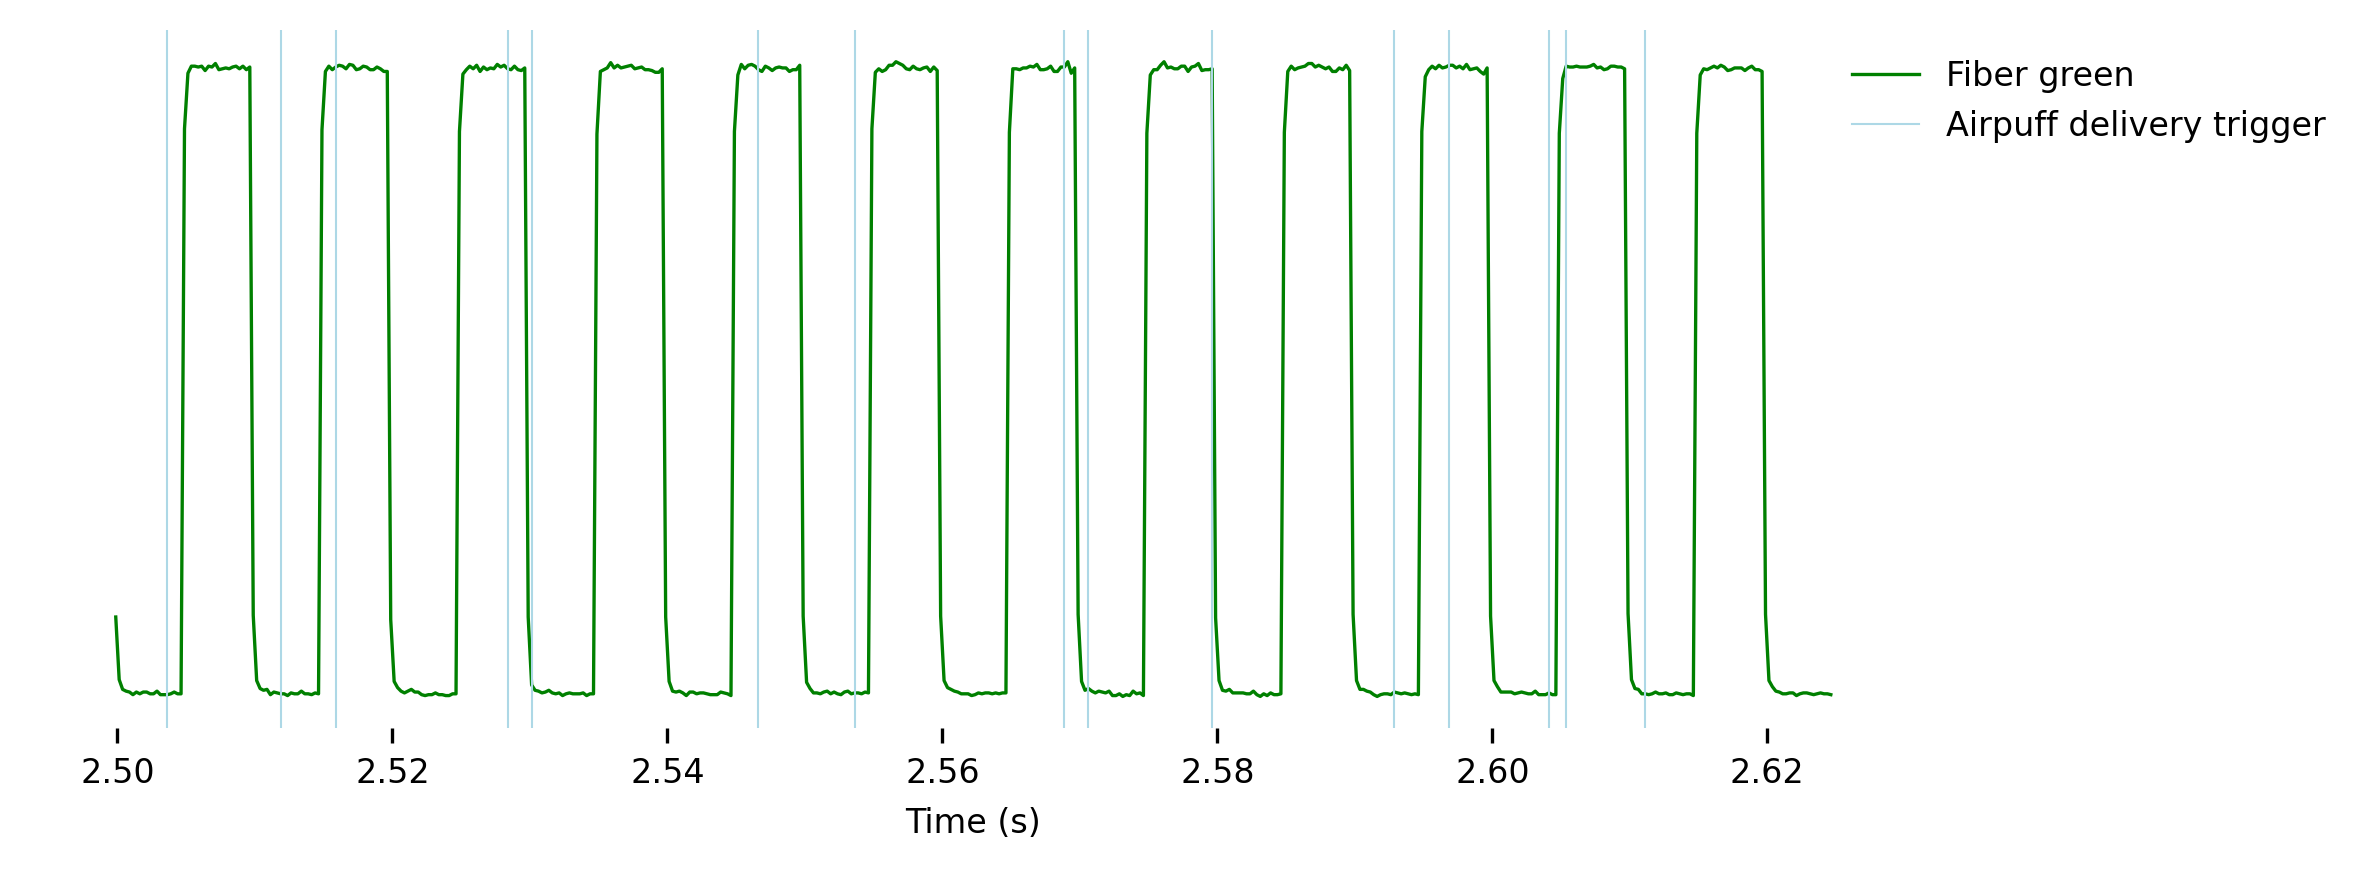

In [217]:
import pandas as pd
from matplotlib import pyplot as plt

# Prepare data for plotting
data = fluorescence_green.data[10000:10500]
timestamps = fluorescence_green.get_timestamps()[10000:10500]

# Add events during selected time
airpuff_events = events[events["event_type"] == 3]
event_times = airpuff_events[(airpuff_events["timestamp"] > 2.5 ) & (airpuff_events["timestamp"] <= 2.62)]["timestamp"]

fig, ax = plt.subplots(figsize=(8, 3), dpi=300)

ax.plot(timestamps, data, color="green", linewidth=0.8)
[plt.axvline(time, color='lightblue', linewidth=0.5) for time in event_times]

ax.yaxis.set_visible(False)
ax.set_frame_on(False)

plt.xlabel('Time (s)', fontsize=8)
plt.tick_params(axis='x', labelsize=8)
plt.legend(["Fiber green", "Airpuff delivery trigger"], frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 8})
plt.tight_layout()
plt.show()

The 405 nm and 470 nm illumination onset times are added to the `TtlsTable`.

In [210]:
ttl_times = nwbfile.acquisition["TtlsTable"][:]
ttl_times

,timestamp,ttl_type,duration
id,,,
0,0.004750,0,0.005
103034,0.009750,1,0.005
1,0.014749,0,0.005
103035,0.019749,1,0.005
2,0.024749,0,0.005
...,...,...,...
103031,1030.081232,0,0.005
206065,1030.086232,1,0.005
103032,1030.091231,0,0.005


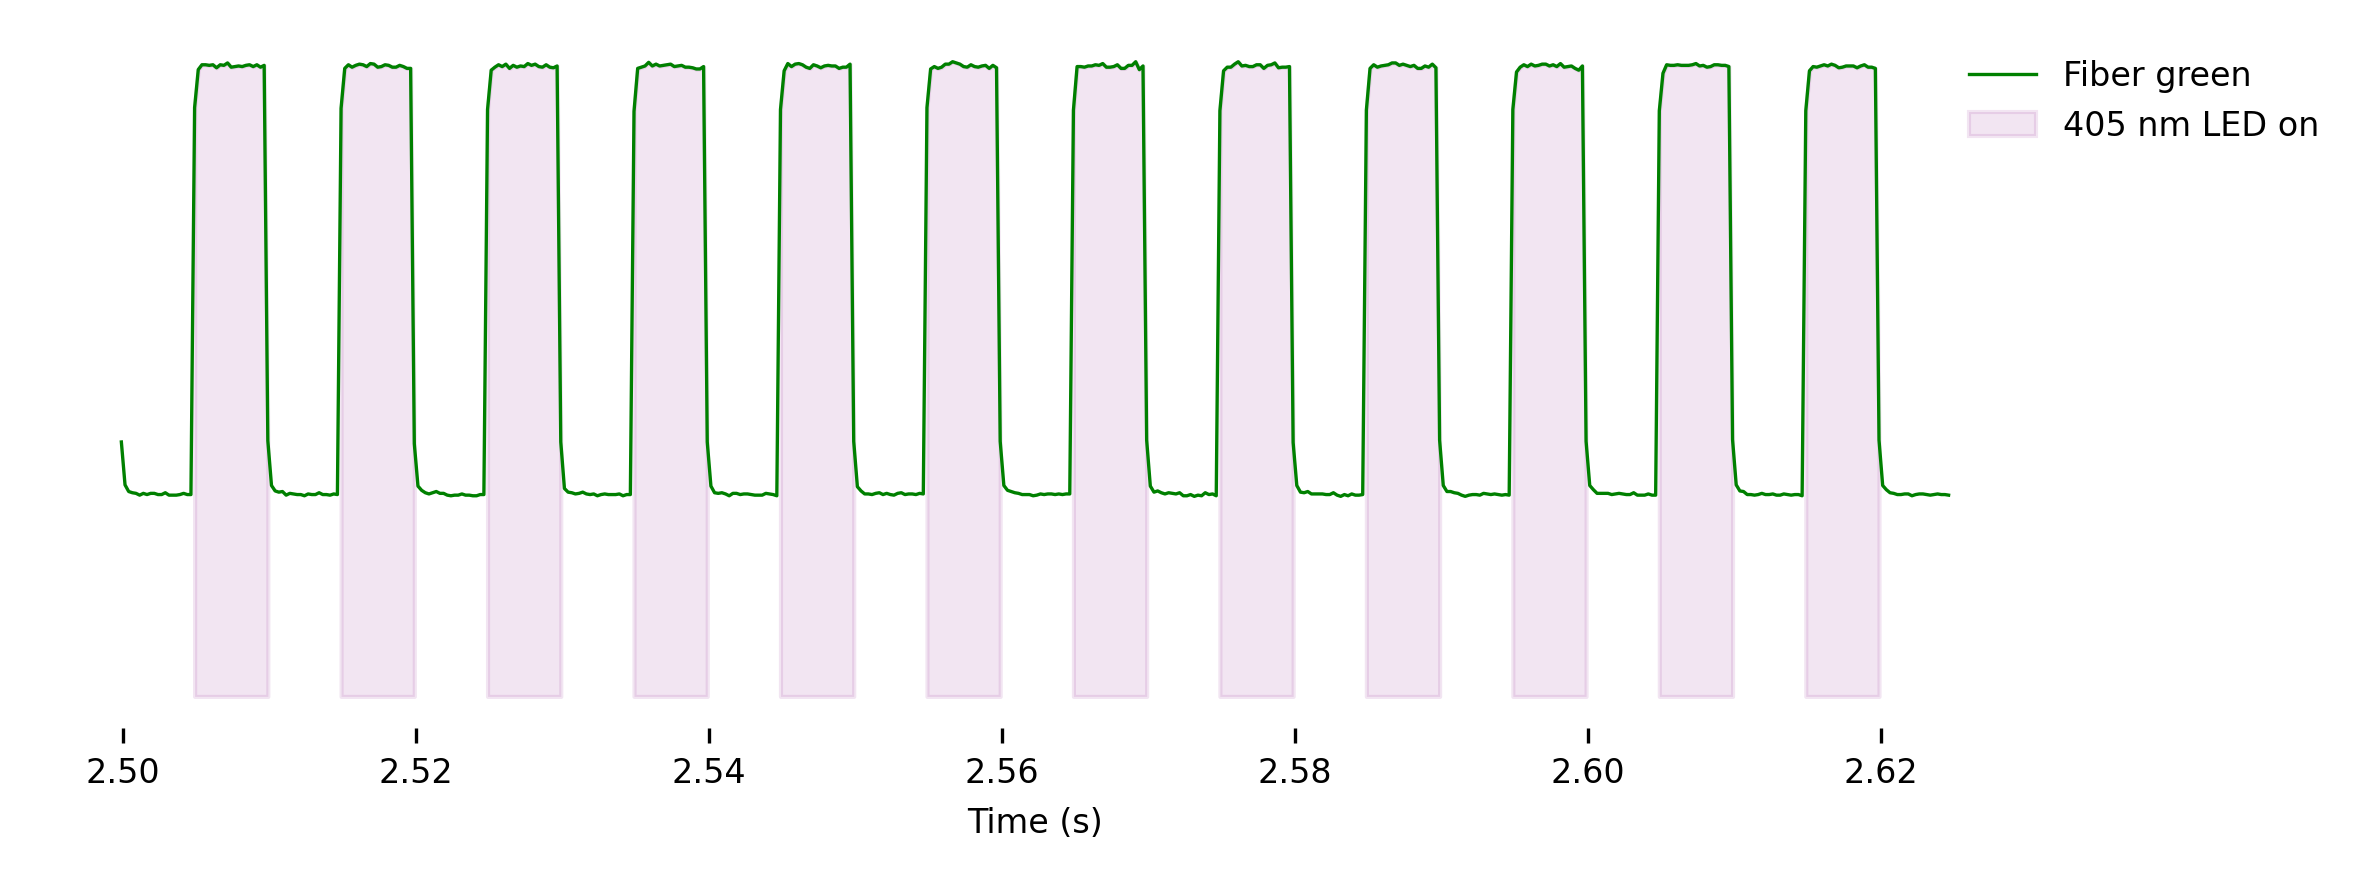

In [227]:
import pandas as pd
from matplotlib import pyplot as plt

# Prepare data for plotting
data = fluorescence_green.data[10000:10500]
timestamps = fluorescence_green.get_timestamps()[10000:10500]

# Add events during selected time
airpuff_events = events[events["event_type"] == 3]
event_times = airpuff_events[(airpuff_events["timestamp"] > 2.5 ) & (airpuff_events["timestamp"] <= 2.6)]["timestamp"]

fig, ax = plt.subplots(figsize=(8, 3), dpi=300)

ax.plot(timestamps, data, color="green", linewidth=0.8)

ttl_0 = ttl_times[ttl_times["ttl_type"] == 0]
violet_illumination_times = ttl_0[(ttl_0["timestamp"] > 2.5 ) & (ttl_0["timestamp"] <= 2.62)]
for illumination_onset in violet_illumination_times["timestamp"]:
    fill_end = illumination_onset + 0.005
    plt.fill_between(timestamps, data, where=(timestamps >= illumination_onset) & (timestamps <= fill_end), color='purple', alpha=0.1)

ax.yaxis.set_visible(False)
ax.set_frame_on(False)

plt.xlabel('Time (s)', fontsize=8)
plt.tick_params(axis='x', labelsize=8)
plt.legend(["Fiber green", "405 nm LED on"], frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 8})
plt.tight_layout()
plt.show()

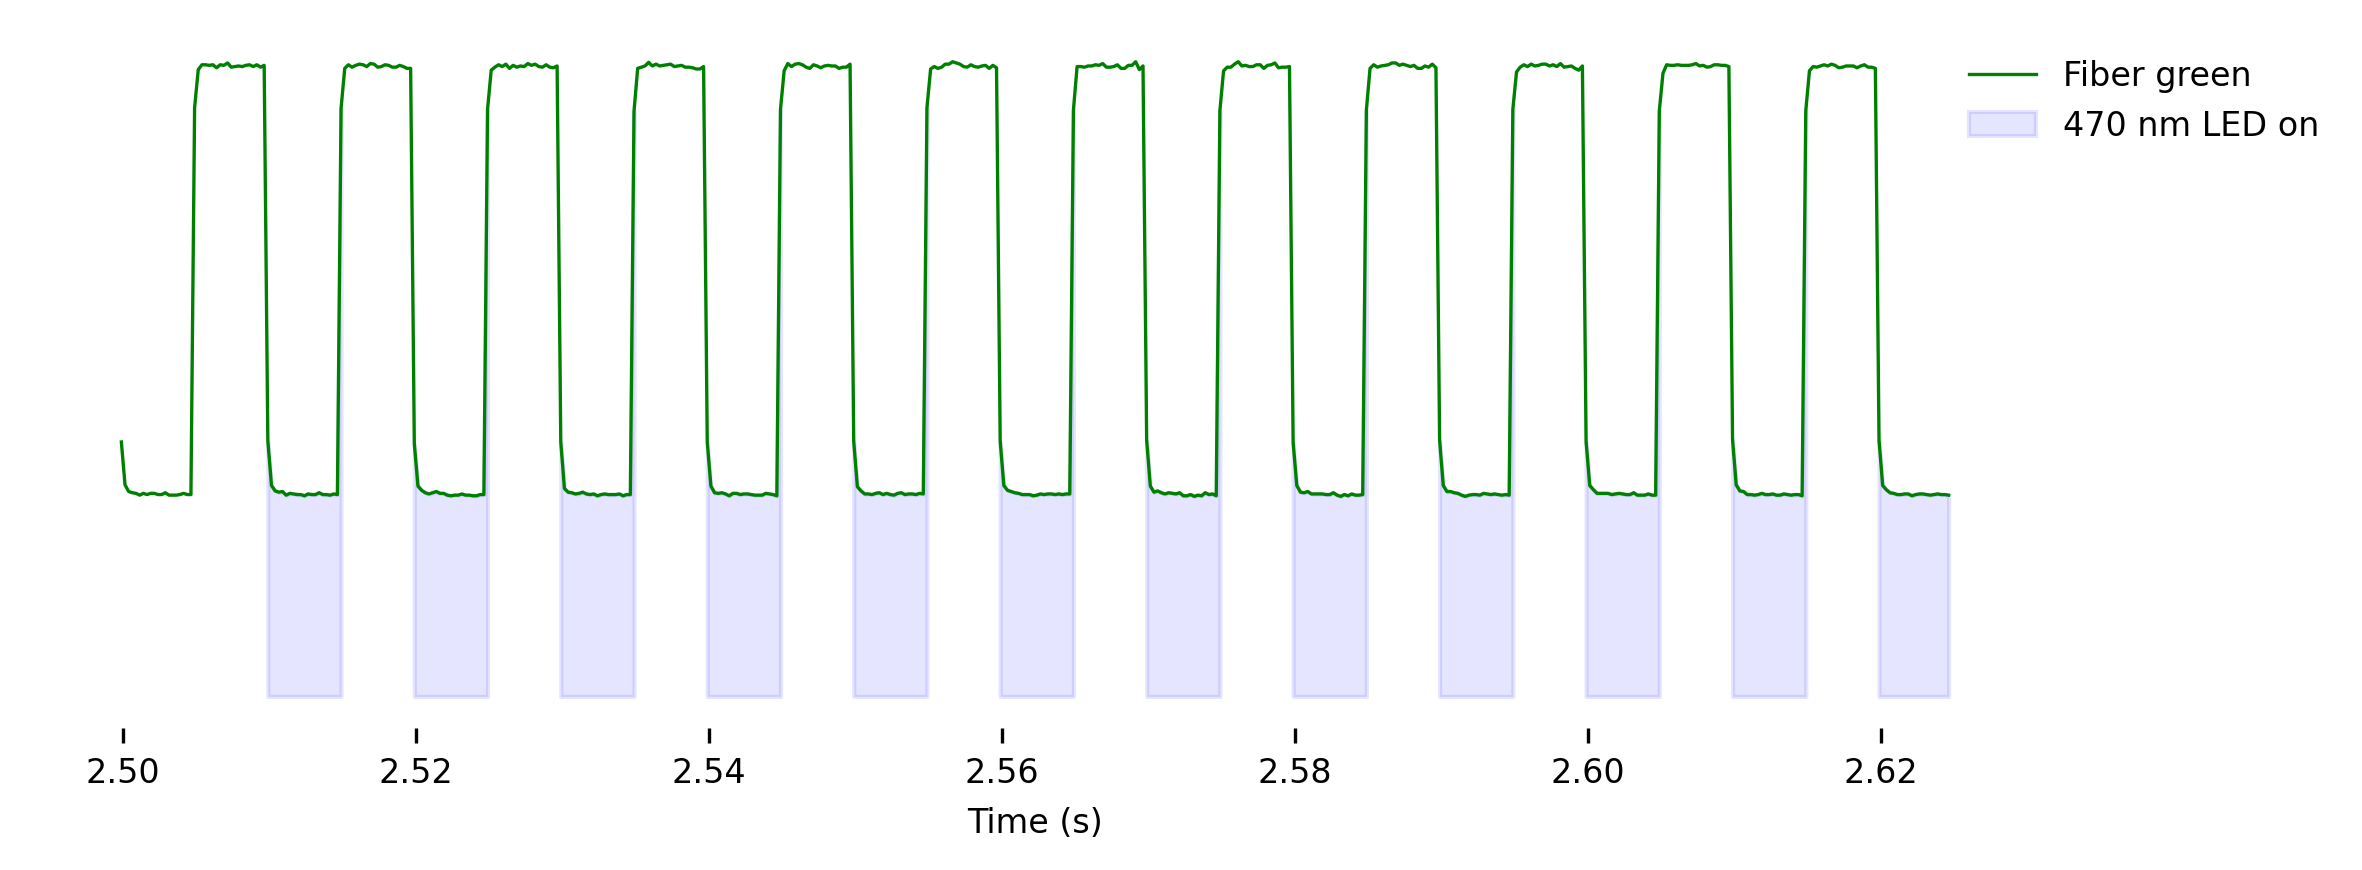

In [225]:
import pandas as pd
from matplotlib import pyplot as plt

# Prepare data for plotting
data = fluorescence_green.data[10000:10500]
timestamps = fluorescence_green.get_timestamps()[10000:10500]

# Add events during selected time
airpuff_events = events[events["event_type"] == 3]
event_times = airpuff_events[(airpuff_events["timestamp"] > 2.5 ) & (airpuff_events["timestamp"] <= 2.6)]["timestamp"]

fig, ax = plt.subplots(figsize=(8, 3), dpi=300)

ax.plot(timestamps, data, color="green", linewidth=0.8)

ttl_1 = ttl_times[ttl_times["ttl_type"] == 1]
blue_illumination_times = ttl_1[(ttl_1["timestamp"] > 2.5 ) & (ttl_1["timestamp"] <= 2.62)]
for illumination_onset in blue_illumination_times["timestamp"]:
    fill_end = illumination_onset + 0.005
    plt.fill_between(timestamps, data, where=(timestamps >= illumination_onset) & (timestamps <= fill_end), color='blue', alpha=0.1)

ax.yaxis.set_visible(False)
ax.set_frame_on(False)

plt.xlabel('Time (s)', fontsize=8)
plt.tick_params(axis='x', labelsize=8)
plt.legend(["Fiber green", "470 nm LED on"], frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 8})
plt.tight_layout()
plt.show()